## Clustering Assignment

HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities.

After the recent funding programmes, they have been able to raise around $ 10 million. Now the CEO of the NGO needs to decide how to use this money strategically and effectively. The significant issues that come while making this decision are mostly related to choosing the countries that are in the direst need of aid.

Our job is to categorise the countries using some socio-economic and health factors that determine the overall development of the country and come up with the countries that are in the direst need of aid.

#### Step 1: Reading and Understanding the data

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [3]:
country = pd.read_csv("Country-data.csv")
country

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


#### Inspecting the dataframe

In [4]:
country.shape

(167, 10)

In [5]:
country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [6]:
country.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


#### Step 2: Data Cleaning

In [7]:
# column-wise percentages of missing values

round((country.isnull().sum()/len(country))*100,2)

country       0.0
child_mort    0.0
exports       0.0
health        0.0
imports       0.0
income        0.0
inflation     0.0
life_expec    0.0
total_fer     0.0
gdpp          0.0
dtype: float64

There are no missing values present in the dataset.

Looking at the data dictioary, the features `exports`, `health`, and `imports` have values in percentages of GDP per capita. We need to convert these features to their original values.

In [8]:
country['exports'] = (country['exports']*country['gdpp'])/100
country['health'] = (country['health']*country['gdpp'])/100
country['imports'] = (country['imports']*country['gdpp'])/100
country

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,1384.02,155.9250,1565.190,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,3847.50,662.8500,2376.000,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,943.20,89.6040,1050.620,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,393.00,67.8580,450.640,4480,23.60,67.5,4.67,1310


#### Step 3: Data Visualization

#### Univariate Analysis

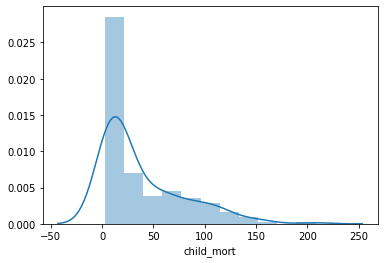

In [9]:
sns.distplot(country['child_mort'])

Though some countries have `child_mort` above 150, most of the countries have `child_mort` below 50.

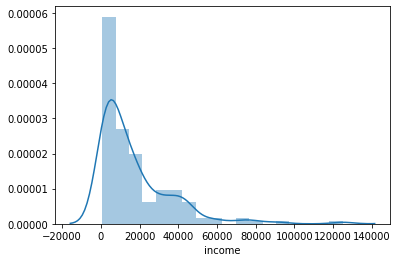

In [10]:
sns.distplot(country['income'])

The net income per person for most of the countries lies below 20000.

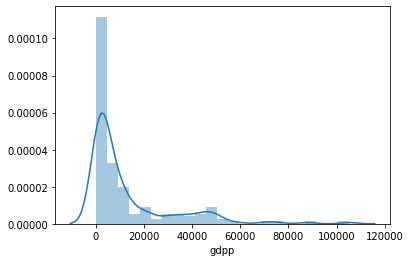

In [11]:
sns.distplot(country['gdpp'])

The same goes for GDP, the GDP of most of the countries lies below 20000.

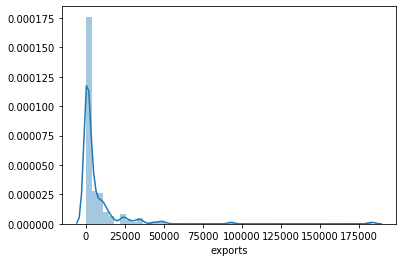

In [12]:
sns.distplot(country['exports'])

The export of goods and services per capita for most of the countries is concenterated between 0 and 25000.

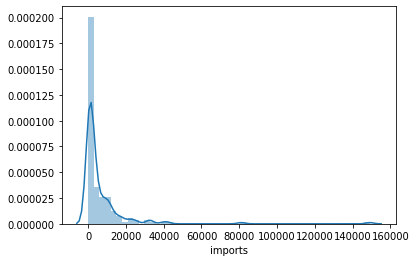

In [13]:
sns.distplot(country['imports'])

The import of goods and services per capita for most of the countries is concenterated between 0 and 20000.

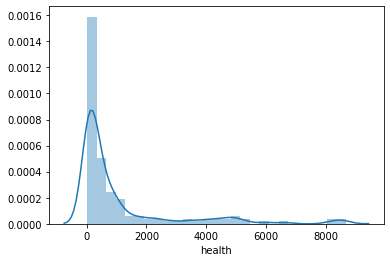

In [14]:
sns.distplot(country['health'])

Total health spending per capita is mostly concenterated between 0 and 2000.

#### Bivariate Analysis

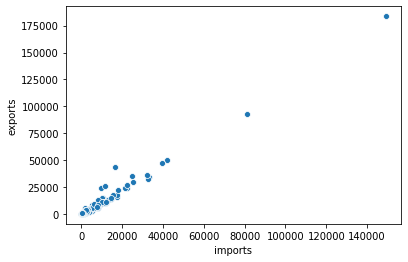

In [15]:
sns.scatterplot(x = 'imports',y = 'exports',data = country)

Couple of countries have exceptional import and export of goods and services per capita, whereas the rest of the countries are concentrated at the bottom left corner of the plot indicating poor import and export of goods and services per capita.

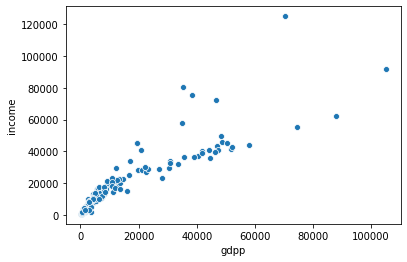

In [16]:
sns.scatterplot(x = 'gdpp',y = 'income',data = country)

Again a very few countries have an exceptional income and GDP per capita, whereas the rest of the countries are concenterated at the bottom left corner of the plot.

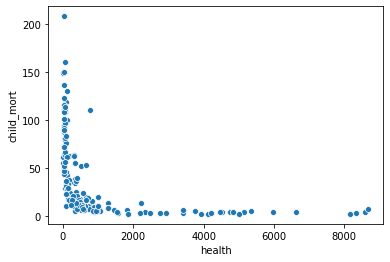

In [17]:
sns.scatterplot(x = 'health',y = 'child_mort',data = country)

Analyzing the above plot one can infer that the countries with low health spending per capita have a high `child_mort` rate.

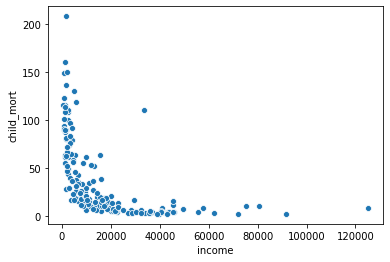

In [18]:
sns.scatterplot(x = 'income',y = 'child_mort',data = country)

We can observe a similar trend here. The countries having high `child_mort` have an income of less than 20000 per person, and as the per person income increases, the `child_mort` rate gradually decreaes.

#### Outlier Analysis

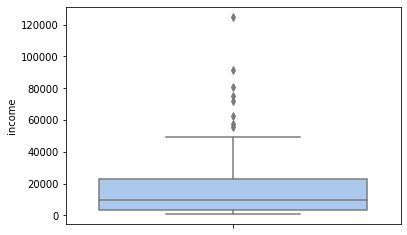

In [19]:
sns.boxplot(y = 'income',data = country,palette = 'pastel')

From statistical point of view there are some outliers present in the feature `income`.

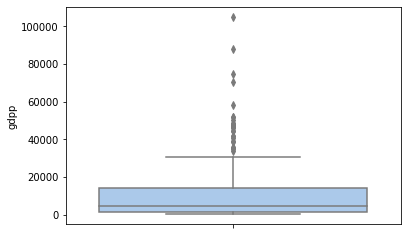

In [20]:
sns.boxplot(y = 'gdpp',data = country,palette = 'pastel')

The feature `gdpp` has got some outliers too which can skew the clusters.

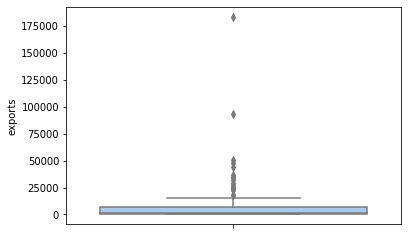

In [21]:
sns.boxplot(y = 'exports',data = country,palette = 'pastel')

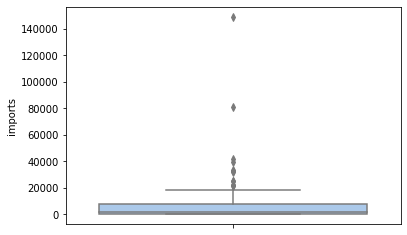

In [22]:
sns.boxplot(y = 'imports',data = country,palette = 'pastel')

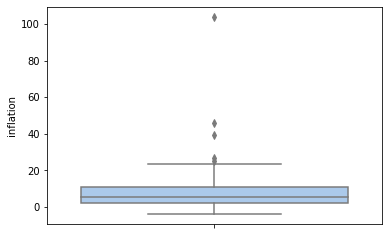

In [23]:
sns.boxplot(y = 'inflation',data = country,palette = 'pastel')

This clearly shows that we have got some outlier values present in the dataset.

#### Step 4: Prepare the data for modeling

#### Outlier Treatment

In [24]:
# outlier treatment for income

Q1 = country.income.quantile(0.95)
country['income'][country['income']>=Q1] = Q1

# outlier treatment for gdpp

Q1 = country.gdpp.quantile(0.95)
country['gdpp'][country['gdpp']>=Q1] = Q1

# outlier treatment for exports

Q1 = country.exports.quantile(0.95)
country['exports'][country['exports']>=Q1] = Q1

# outlier treatment for imports

Q1 = country.imports.quantile(0.95)
country['imports'][country['imports']>=Q1] = Q1

# outlier treatment for inflation

Q1 = country.inflation.quantile(0.95)
country['inflation'][country['income']>=Q1] = Q1

We have successfully treated the outlier values.

In [25]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [26]:
hopkins(country.drop('country',axis = 1))

0.9324453274313422

This implies that the dataset has a high cluster tendency.

#### Scaling the features

In [27]:
scaler = StandardScaler()
numvars = country.drop('country',axis = 1)
numvars = scaler.fit_transform(numvars)
numvars = pd.DataFrame(numvars)
numvars.columns = ['child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp']
numvars

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-0.669581,-0.565040,-0.732729,-0.958349,0.0,-1.619092,1.902882,-0.757362
1,-0.538949,-0.542172,-0.439218,-0.472182,-0.394006,0.0,0.647866,-0.859973,-0.523321
2,-0.272833,-0.475838,-0.484826,-0.560152,-0.192552,0.0,0.670423,-0.038404,-0.498838
3,2.007808,-0.418960,-0.532363,-0.543087,-0.667360,0.0,-1.179234,2.128151,-0.560376
4,-0.695634,-0.027134,-0.178771,0.306422,0.227992,0.0,0.704258,-0.541946,0.013312
...,...,...,...,...,...,...,...,...,...
162,-0.225578,-0.514254,-0.501562,-0.535475,-0.867457,0.0,-0.852161,0.365754,-0.597431
163,-0.526514,-0.226273,-0.219310,-0.414026,0.051635,0.0,0.546361,-0.316678,0.099332
164,-0.372315,-0.565786,-0.538488,-0.612551,-0.763000,0.0,0.286958,-0.661206,-0.707272
165,0.448417,-0.630104,-0.550596,-0.702420,-0.763678,0.0,-0.344633,1.140944,-0.707272


#### Step 5: Model Building

We will first build the model using KMeans algorithm and then using the hierarchical clustering.

#### K-Means algorithm

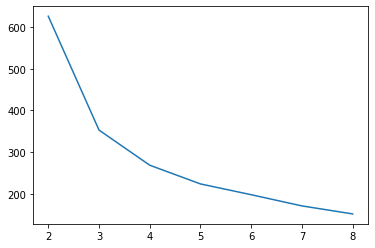

In [28]:
# elbow curve

ssd = []
mylist = [2,3,4,5,6,7,8]
for i in mylist:
    kmeans = KMeans(n_clusters = i,max_iter=50)
    kmeans.fit(numvars)
    ssd.append({'K':i,'SSD':kmeans.inertia_})

ssd_df = pd.DataFrame(ssd)

plt.plot(ssd_df['K'],ssd_df['SSD'])

In [29]:
for i in mylist:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters = i,max_iter = 50)
    kmeans.fit(numvars)
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(numvars,cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(i,silhouette_avg))

For n_clusters=2, the silhouette score is 0.5232092393527156
For n_clusters=3, the silhouette score is 0.47934130537497754
For n_clusters=4, the silhouette score is 0.4521132317120496
For n_clusters=5, the silhouette score is 0.3698875677455359
For n_clusters=6, the silhouette score is 0.37381960922662627
For n_clusters=7, the silhouette score is 0.30725280744257744
For n_clusters=8, the silhouette score is 0.3203995698434908


Analyzing the elbow curve and the silhouette score, K = 3 seems like the optimum number of clusters.

In [30]:
# moving ahead with K = 3

kmeans = KMeans(n_clusters = 3,max_iter = 50,random_state = 50)
kmeans.fit(numvars)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=50, tol=0.0001, verbose=0)

In [31]:
kmeans.labels_

array([2, 0, 0, 2, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0,
       0, 1, 0, 2, 2, 0, 2, 1, 0, 2, 2, 0, 0, 0, 2, 2, 2, 0, 2, 0, 1, 1,
       1, 0, 0, 0, 0, 2, 2, 0, 0, 1, 1, 2, 2, 0, 1, 2, 1, 0, 0, 2, 2, 0,
       2, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 2, 2, 1, 0, 2, 0, 0, 2,
       2, 0, 0, 1, 0, 2, 2, 0, 0, 2, 1, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0,
       1, 1, 2, 2, 1, 1, 2, 0, 0, 0, 0, 0, 1, 1, 0, 0, 2, 0, 0, 2, 0, 0,
       2, 1, 1, 1, 2, 2, 1, 1, 0, 0, 2, 0, 1, 1, 0, 2, 0, 2, 2, 0, 0, 0,
       0, 2, 0, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2])

In [32]:
# assigning the labels

country['Cluster_K'] = kmeans.labels_
country

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster_K
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,20.87,56.2,5.82,553,2
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,20.87,76.3,1.65,4090,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,20.87,76.5,2.89,4460,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,20.87,60.1,6.16,3530,2
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,20.87,76.8,2.13,12200,0
...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,1384.02,155.9250,1565.190,2950.0,20.87,63.0,3.50,2970,0
163,Venezuela,17.1,3847.50,662.8500,2376.000,16500.0,20.87,75.4,2.47,13500,0
164,Vietnam,23.3,943.20,89.6040,1050.620,4490.0,20.87,73.1,1.95,1310,0
165,Yemen,56.3,393.00,67.8580,450.640,4480.0,20.87,67.5,4.67,1310,2


#### Step 6: Analyzing the clusters

In [33]:
# number of countries in each cluster

country['Cluster_K'].value_counts()

0    83
2    46
1    38
Name: Cluster_K, dtype: int64

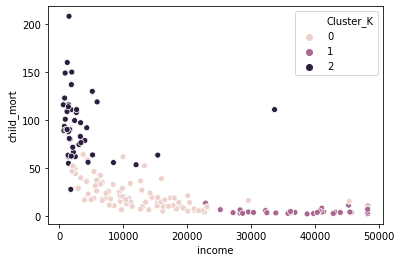

In [34]:
sns.scatterplot(x = 'income',y = 'child_mort',hue = 'Cluster_K',data = country)

Analyzing the scatter plot between `child_mort` and `income`, we can clearly see the formation of three clusters.

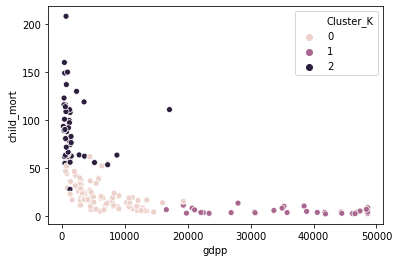

In [35]:
sns.scatterplot(x = 'gdpp',y = 'child_mort',hue = 'Cluster_K',data = country)

The scatter plot between `child_mort` and `gdpp` shows a similar trend of the formation of three clusters.

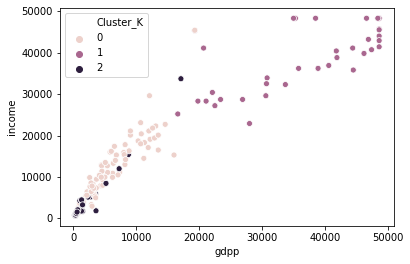

In [36]:
sns.scatterplot(x = 'gdpp',y = 'income',hue = 'Cluster_K',data = country)

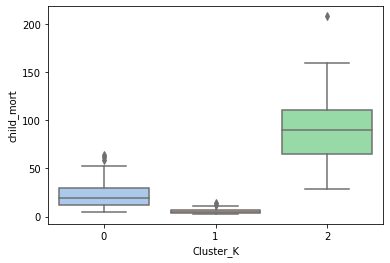

In [37]:
sns.boxplot(x = 'Cluster_K',y = 'child_mort',data = country,palette = 'pastel')

Analyzing the above box plot, it seems like the countries with cluster label 2 have the highest `child_mort` rate, whereas the countries with cluster label 1 have really low `child_mort` rate.

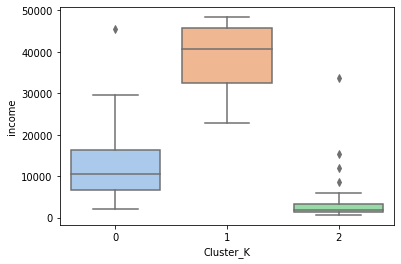

In [38]:
sns.boxplot(x = 'Cluster_K',y = 'income',data = country,palette = 'pastel')

Analyzing the above box plot, the countries with cluster label 2 have net income per person less than 10000, whereas the majority of  the countries with cluster label 1 have net income per person greater than 30000.

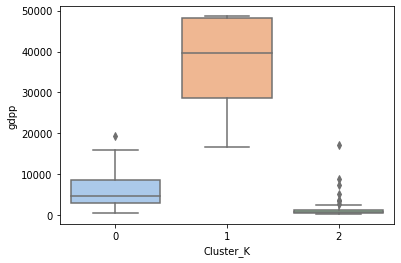

In [39]:
sns.boxplot(x = 'Cluster_K',y = 'gdpp',data = country,palette = 'pastel')

We can observe a similar trend here, the countries with cluster label 2 have the GDP per capita less than 10000, whereas the majority of the countries with cluster label 1 have the GDP per capita greater than 30000.

Analyzing the above plots we can infer that the countries having the cluster label 2 are under-developed countries whereas the countries having the cluster label 1 and 0 are developed countries.

#### Cluster Profiling

In [40]:
profiling = country.drop('country',axis = 1).groupby('Cluster_K')['child_mort','income','gdpp'].mean()
profiling = profiling.reset_index()
profiling

,Cluster_K,child_mort,income,gdpp
0,0,22.622892,11923.975904,6109.903614
1,1,5.407895,38884.473684,37260.263158
2,2,93.650000,3501.586957,1756.347826


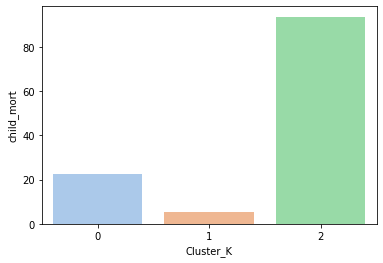

In [41]:
sns.barplot(x = 'Cluster_K',y = 'child_mort',data = profiling,palette = 'pastel')

Comparing all the clusters, on an average, we can infer that the countries with the cluster label 2 have the highest `child_mort` rate.

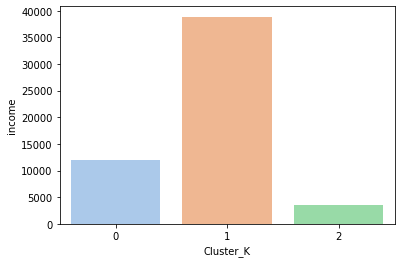

In [42]:
sns.barplot(x = 'Cluster_K',y = 'income',data = profiling,palette = 'pastel')

On an average, countries with the cluster label 2 have the lowest income per person.

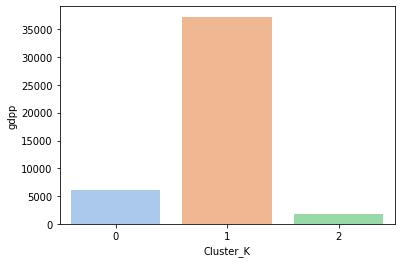

In [43]:
sns.barplot(x = 'Cluster_K',y = 'gdpp',data = profiling,palette = 'pastel')

Again, on an average, countries with the cluster label 2 have the lowest GDP per capita.

All in all, the countries that are in the direst need of aid belong to the cluster label 2.

In [44]:
# top five countries in direst need of aid

top_five = country[country['Cluster_K'] == 2].sort_values(by = ['child_mort','income','gdpp'],ascending = [False,True,True]).head()
top_five

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster_K
66,Haiti,208.0,101.286,45.7442,428.314,1500.0,20.87,32.1,3.33,662,2
132,Sierra Leone,160.0,67.032,52.2690,137.655,1220.0,20.87,55.0,5.20,399,2
32,Chad,150.0,330.096,40.6341,390.195,1930.0,20.87,56.5,6.59,897,2
31,Central African Republic,149.0,52.628,17.7508,118.190,888.0,20.87,47.5,5.21,446,2
97,Mali,137.0,161.424,35.2584,248.508,1870.0,20.87,59.5,6.55,708,2


#### Step 7: Model Building

#### Hierarchical Clustering algorithm

In [45]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

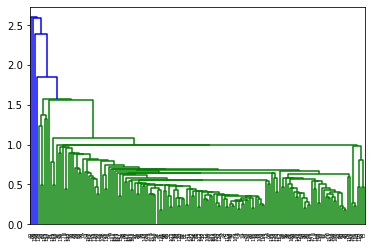

In [46]:
# single linkage

mergings = linkage(numvars,method = "single",metric = 'euclidean')
dendrogram(mergings)
plt.show()

Single linkage doesn't produce a good enough result for us to analyse the clusters. Hence, we need to go ahead and utilise the complete linkage method and then analyse the clusters once again.

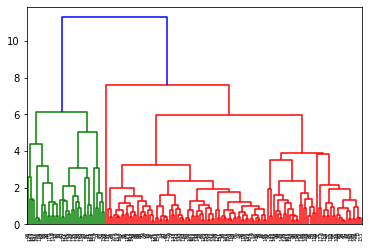

In [47]:
# complete linkage

mergings = linkage(numvars,method = "complete",metric = 'euclidean')
dendrogram(mergings)
plt.show()

In [48]:
# moving ahead with 3 clusters

cluster_labels = cut_tree(mergings,n_clusters = 3).reshape(-1, )
cluster_labels

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       2, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0])

In [49]:
# assigning the cluster labels

country['Cluster_H'] = cluster_labels
country

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster_K,Cluster_H
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,20.87,56.2,5.82,553,2,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,20.87,76.3,1.65,4090,0,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,20.87,76.5,2.89,4460,0,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,20.87,60.1,6.16,3530,2,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,20.87,76.8,2.13,12200,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,1384.02,155.9250,1565.190,2950.0,20.87,63.0,3.50,2970,0,0
163,Venezuela,17.1,3847.50,662.8500,2376.000,16500.0,20.87,75.4,2.47,13500,0,0
164,Vietnam,23.3,943.20,89.6040,1050.620,4490.0,20.87,73.1,1.95,1310,0,0
165,Yemen,56.3,393.00,67.8580,450.640,4480.0,20.87,67.5,4.67,1310,2,0


#### Step 8: Analyzing the clusters

In [50]:
# number of countries in each cluster

country['Cluster_H'].value_counts()

0    127
1     39
2      1
Name: Cluster_H, dtype: int64

There is one cluster with just one country present in it.

In [51]:
country[country['Cluster_H'] == 2]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster_K,Cluster_H
66,Haiti,208.0,101.286,45.7442,428.314,1500.0,20.87,32.1,3.33,662,2,2


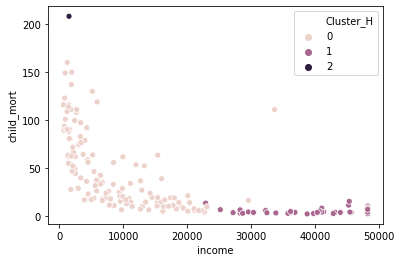

In [52]:
sns.scatterplot(x = 'income',y = 'child_mort',hue = 'Cluster_H',data = country)

Analyzing the scatter plot between `child_mort` and `income`, we can clearly see the formation of the clusters.

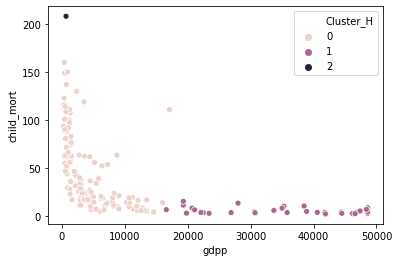

In [53]:
sns.scatterplot(x = 'gdpp',y = 'child_mort',hue = 'Cluster_H',data = country)

The scatter plot between `child_mort` and `gdpp` shows a similar trend of the formation of the clusters.

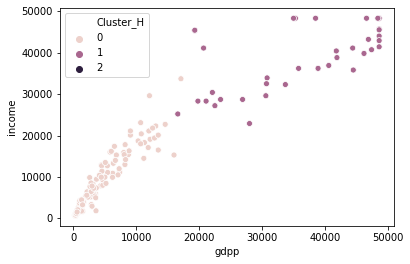

In [54]:
sns.scatterplot(x = 'gdpp',y = 'income',hue = 'Cluster_H',data = country)

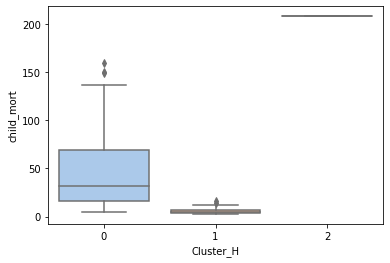

In [55]:
sns.boxplot(x = 'Cluster_H',y = 'child_mort',data = country,palette = 'pastel')

Analyzing the above box plot, it seems like the country with cluster label 2 has the highest `child_mort` rate, whereas the countries with cluster label 0 have higher `child_mort` rate as compared to the countries with cluster label 1.

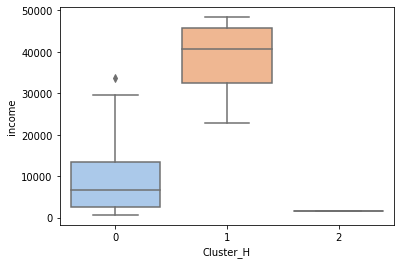

In [56]:
sns.boxplot(x = 'Cluster_H',y = 'income',data = country,palette = 'pastel')

Analyzing the above box plot, the country with cluster label 2 has net income per person of 1500, whereas the majority of  the countries with cluster label 1 have net income per person greater than 30000.

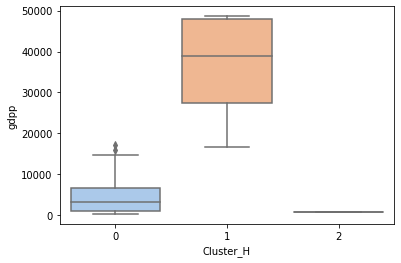

In [57]:
sns.boxplot(x = 'Cluster_H',y = 'gdpp',data = country,palette = 'pastel')

We can observe a similar trend here, the country with cluster label 2 has the GDP per capita of 662, whereas the majority of the countries with cluster label 1 have the GDP per capita greater than 30000.

Analyzing the above plots we can infer that the countries having the cluster label 0 and 2 are under-developed countries whereas the countries having the cluster label 1 are developed countries.

#### Cluster Profiling

In [58]:
profiling = country.drop('country',axis = 1).groupby('Cluster_H')['child_mort','income','gdpp'].mean()
profiling = profiling.reset_index()
profiling

,Cluster_H,child_mort,income,gdpp
0,0,46.944094,8691.834646,4472.062992
1,1,5.671795,39051.538462,36799.743590
2,2,208.000000,1500.000000,662.000000


In [59]:
# dropping the country with cluster label 2

profiling.drop(index = 2,inplace = True)

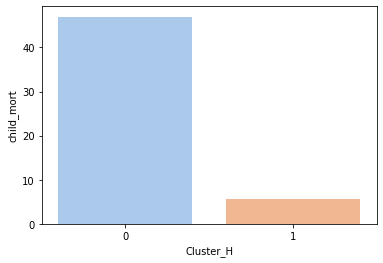

In [60]:
sns.barplot(x = 'Cluster_H',y = 'child_mort',data = profiling,palette = 'pastel')

Comparing the two clusters, on an average, we can infer that the countries with the cluster label 0 have the higher `child_mort` rate.

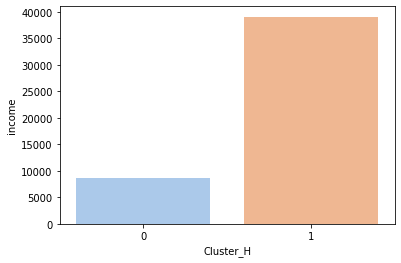

In [61]:
sns.barplot(x = 'Cluster_H',y = 'income',data = profiling,palette = 'pastel')

On an average, countries with the cluster label 0 have the lower income per person.

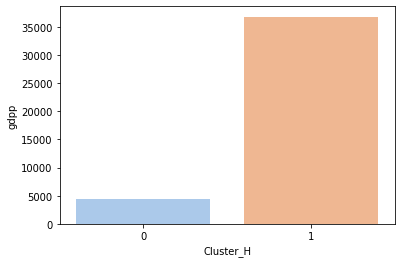

In [62]:
sns.barplot(x = 'Cluster_H',y = 'gdpp',data = profiling,palette = 'pastel')

Again, on an average, countries with the cluster label 0 have the lower GDP per capita.

All in all, the countries that are in the direst need of aid belong to the cluster label 0.

In [63]:
# top five countries in the direst need of aid, if we choose to remove Haiti from the list

top_five = country[country['Cluster_H'] == 0].sort_values(by = ['child_mort','income','gdpp'],ascending = [False,True,True]).head()
top_five

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster_K,Cluster_H
132,Sierra Leone,160.0,67.032,52.2690,137.655,1220.0,20.87,55.0,5.20,399,2,0
32,Chad,150.0,330.096,40.6341,390.195,1930.0,20.87,56.5,6.59,897,2,0
31,Central African Republic,149.0,52.628,17.7508,118.190,888.0,20.87,47.5,5.21,446,2,0
97,Mali,137.0,161.424,35.2584,248.508,1870.0,20.87,59.5,6.55,708,2,0
113,Nigeria,130.0,589.490,118.1310,405.420,5150.0,20.87,60.5,5.84,2330,2,0


The top five countries which are in the direst need of aid based on the socio-economic and health factors are:
1. Haiti
2. Sierra Leone
3. Chad
4. Central African Republic
5. Mali